In [2]:
#Build a SVM model for image classification using Sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Load the data from directory
# Each folder contains images of a specific class
import os
import PIL
from tqdm import tqdm

DATADIR = "/home/magsam/school_workspace/MLDL_2024/cbs_mldl_2024/dataset-resized"
CATEGORIES = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Resize the images to 96x96
IMG_SIZE = 96

# Load the images and labels
data = []
labels = []
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in tqdm(os.listdir(path)):
        try:
            img_array = PIL.Image.open(os.path.join(path, img))
            img_array = img_array.resize((IMG_SIZE, IMG_SIZE))
            data.append(np.array(img_array))
            labels.append(class_num)
        except Exception as e:
            pass



  0%|          | 0/403 [00:00<?, ?it/s]

100%|██████████| 137/137 [00:00<00:00, 248.98it/s]


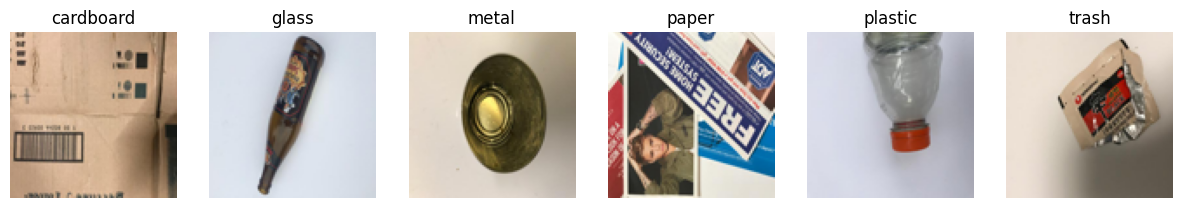

In [4]:
# Let us look at an image from each category
fig, ax = plt.subplots(1, 6, figsize=(15, 15))
for i, category in enumerate(CATEGORIES):
    # Find the first image index for the current category
    image_index = labels.index(i)
    ax[i].imshow(data[image_index])
    ax[i].set_title(category)
    ax[i].axis("off")
plt.show()


In [5]:
# Convert the data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalize out images
data = data / 255.0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42, stratify=labels, shuffle=True)

# Split to training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

print(f"Train size = {len(X_train)}")
print(f"Validation size = {len(X_val)}")
print(f"Test size = {len(X_test)}")

# Print distribution of classes in the training and validation sets normalized
unique, counts = np.unique(y_train, return_counts=True)
print({k: round(v, 2) for k, v in zip(unique, counts*100/len(y_train))})

unique, counts = np.unique(y_val, return_counts=True)
print({k: round(v, 2) for k, v in zip(unique, counts*100/len(y_val))})


Train size = 1819
Validation size = 455
Test size = 253
{0: 15.94, 1: 19.85, 2: 16.22, 3: 23.47, 4: 19.08, 5: 5.44}
{0: 16.04, 1: 19.78, 2: 16.26, 3: 23.52, 4: 19.12, 5: 5.27}


Validation accuracy = 0.643956043956044
              precision    recall  f1-score   support

   cardboard       0.77      0.70      0.73        73
       glass       0.49      0.54      0.51        90
       metal       0.58      0.55      0.57        74
       paper       0.69      0.79      0.74       107
     plastic       0.72      0.70      0.71        87
       trash       0.67      0.25      0.36        24

    accuracy                           0.64       455
   macro avg       0.65      0.59      0.60       455
weighted avg       0.65      0.64      0.64       455



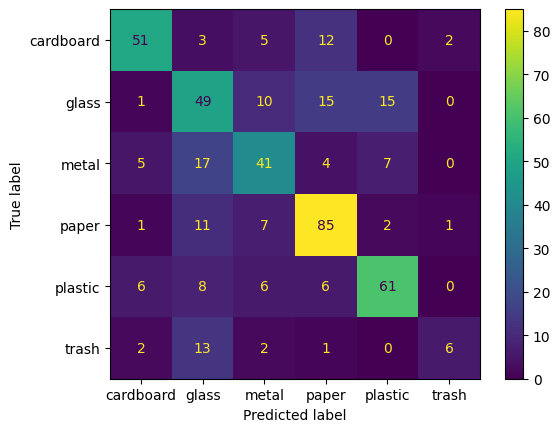

In [9]:
# Build the SVM model
model = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, random_state=42))

# Train the model on the training data
model.fit(X_train.reshape(len(X_train), -1), y_train)

# Predict the labels of the validation set
y_pred = model.predict(X_val.reshape(len(X_val), -1))

# Calculate the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation accuracy = {accuracy}")

# Print the classification report
print(classification_report(y_val, y_pred, target_names=CATEGORIES))

# Print the confusion matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CATEGORIES)
disp.plot()
plt.show()


In [10]:
# Save the model
import joblib
joblib.dump(model, "svm_model.pkl")
print("Model saved as svm_model.pkl")


Model saved as svm_model.pkl
